In [1]:
#chapter 3 question 1
library(cluster)
votes <- na.omit(cluster::votes.repub)
logit <- function(x) log(x / (1-x))
transformed <- logit(votes/100)

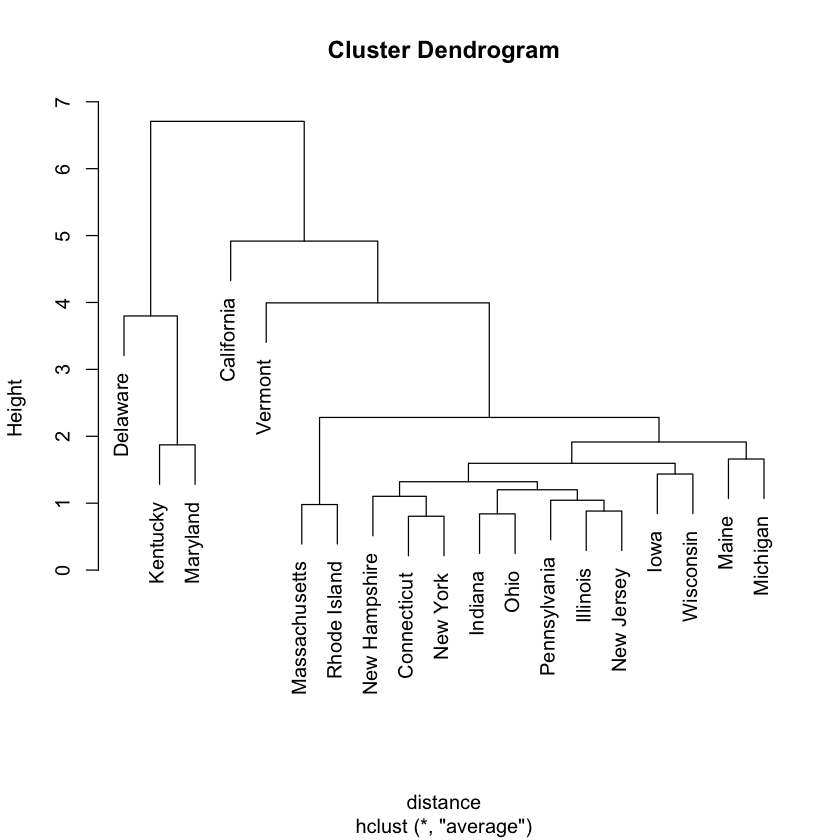

In [2]:
#(a)perform a hierarchical cluster analysis of these data
distance <- dist(transformed)
upgma <- hclust(distance, method='average')
plot(upgma)

Loading required package: ape

Loading required package: MASS

Loading required package: paran



10%  20%  30%  40%  50%  60%  70%  80%  90%  100%  



[1] 5

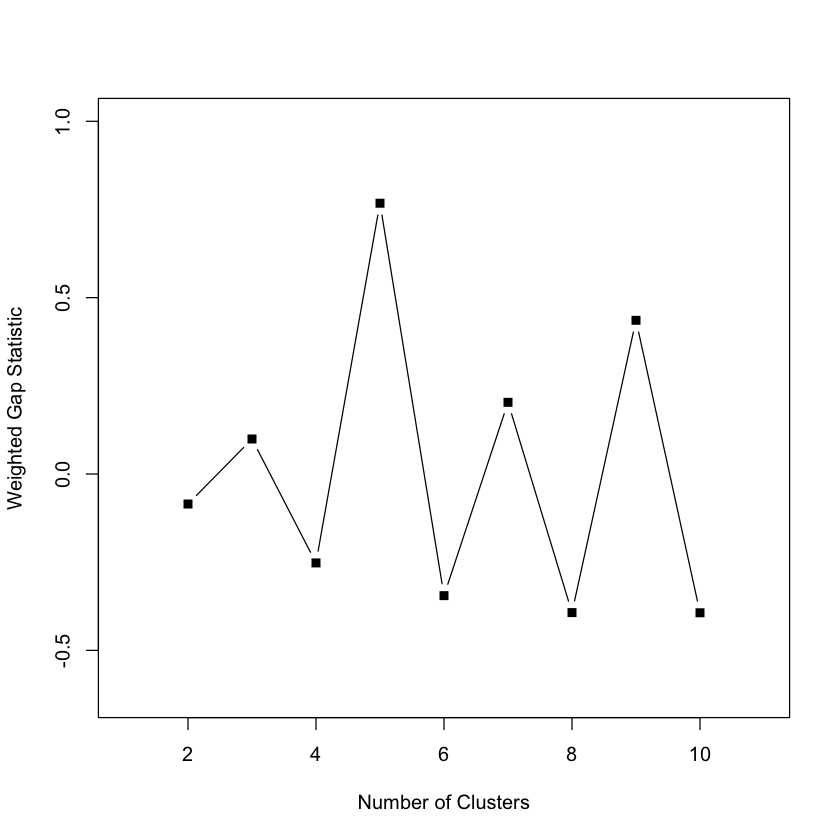

In [3]:
#(b)ddwtGap with the argument genRndm="uni" to see how many 
#statistically significant clusters there are according to this metric.
library(splits)
gap.stat <- ddwtGap(transformed, genRndm='uni')
with(gap.stat, plot(colMeans(DDwGap),pch=15,type='b',
                    ylim=extendrange(colMeans(DDwGap),f=0.2),
                    xlab="Number of Clusters", ylab="Weighted Gap Statistic"))
gap.stat$mnGhatWG

In [ ]:
#(c)do you think the output of ddwtGap is correct? why?

10%  20%  30%  40%  50%  60%  70%  80%  90%  100%  



[1] 3

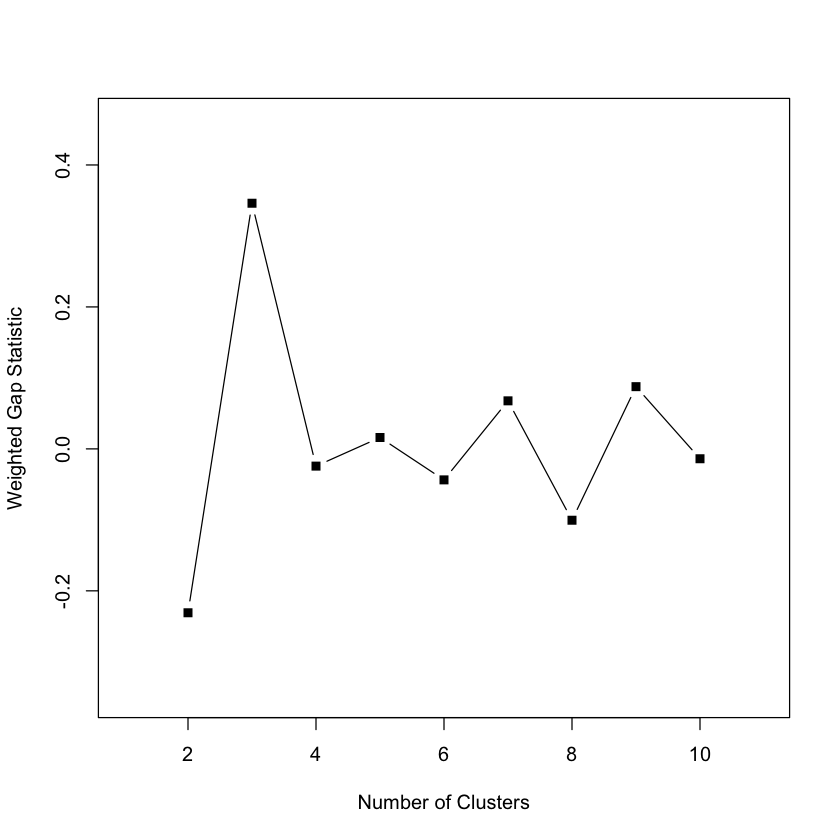

In [7]:
# chapter 3 question 3
# (a)use ddwtGap to determine the optimal number of clusters in this dataset
data('iris')
gap.stat.iris <- ddwtGap(iris[,1:4])
with(gap.stat.iris, plot(colMeans(DDwGap),pch=15,type='b',
                    ylim=extendrange(colMeans(DDwGap),f=0.2),
                    xlab="Number of Clusters", ylab="Weighted Gap Statistic"))
gap.stat.iris$mnGhatWG

In [10]:
#(b) Run a k-means analysis with at least ten restarts, using the number of clusters you identified above.
k.means <- kmeans(iris[,-5], centers=3, nstart=10)
k.means


K-means clustering with 3 clusters of sizes 38, 62, 50

Cluster means:
  Sepal.Length Sepal.Width Petal.Length Petal.Width
1     6.850000    3.073684     5.742105    2.071053
2     5.901613    2.748387     4.393548    1.433871
3     5.006000    3.428000     1.462000    0.246000

Clustering vector:
  [1] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 [38] 3 3 3 3 3 3 3 3 3 3 3 3 3 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [75] 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 1 1 1 2 1 1 1 1
[112] 1 1 2 2 1 1 1 1 2 1 2 1 2 1 1 2 2 1 1 1 1 1 2 1 1 1 1 2 1 1 1 2 1 1 1 2 1
[149] 1 2

Within cluster sum of squares by cluster:
[1] 23.87947 39.82097 15.15100
 (between_SS / total_SS =  88.4 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      

   
    setosa versicolor virginica
  1      0          2        36
  2      0         48        14
  3     50          0         0

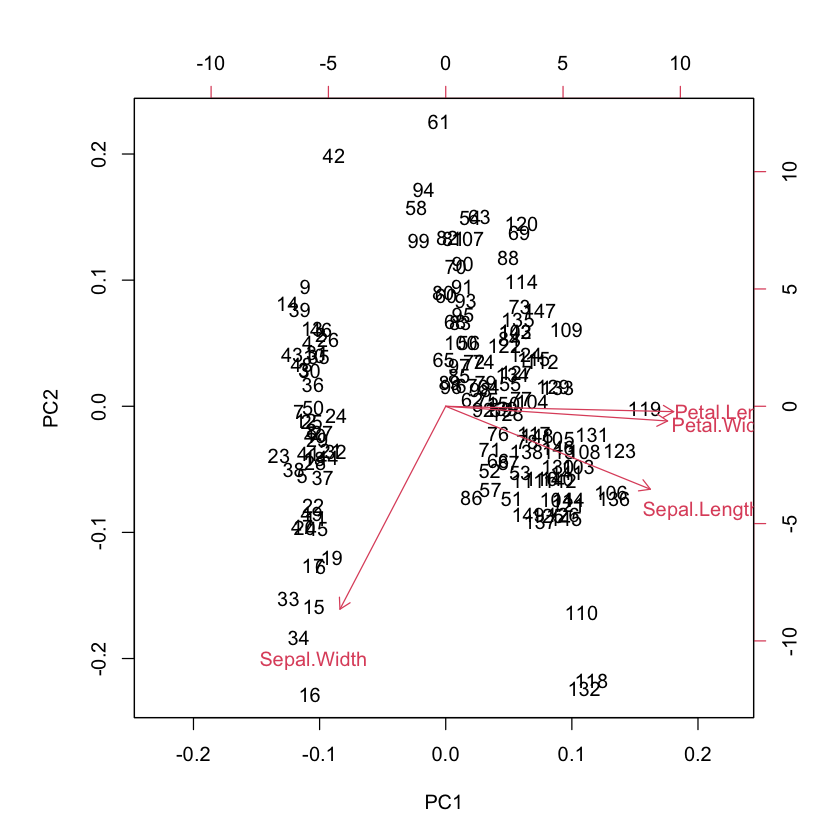

Importance of components:
                          PC1    PC2     PC3     PC4
Standard deviation     1.7084 0.9560 0.38309 0.14393
Proportion of Variance 0.7296 0.2285 0.03669 0.00518
Cumulative Proportion  0.7296 0.9581 0.99482 1.00000

Standard deviations (1, .., p=4):
[1] 1.7083611 0.9560494 0.3830886 0.1439265

Rotation (n x k) = (4 x 4):
                    PC1         PC2        PC3        PC4
Sepal.Length  0.5210659 -0.37741762  0.7195664  0.2612863
Sepal.Width  -0.2693474 -0.92329566 -0.2443818 -0.1235096
Petal.Length  0.5804131 -0.02449161 -0.1421264 -0.8014492
Petal.Width   0.5648565 -0.06694199 -0.6342727  0.5235971

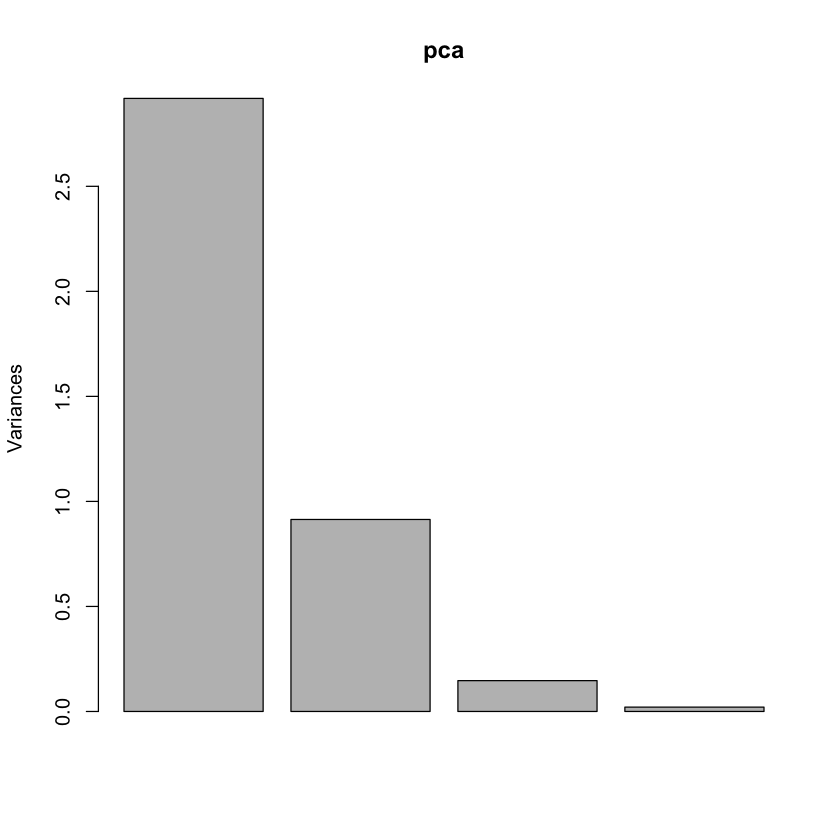

In [14]:
#(d)
table(k.means$cluster, iris[,5])
pca <- prcomp(iris[,-5], scale=TRUE)
biplot(pca)
plot(pca)
summary(pca)
pca

Package 'mclust' version 5.4.7
Type 'citation("mclust")' for citing this R package in publications.



---------------------------------------------------- 
Gaussian finite mixture model fitted by EM algorithm 
---------------------------------------------------- 

Mclust VEV (ellipsoidal, equal shape) model with 2 components: 

 log-likelihood   n df       BIC       ICL
       -215.726 150 26 -561.7285 -561.7289

Clustering table:
  1   2 
 50 100 

'Mclust' model object: (VEV,2) 

Available components: 
 [1] "call"           "data"           "modelName"      "n"             
 [5] "d"              "G"              "BIC"            "loglik"        
 [9] "df"             "bic"            "icl"            "hypvol"        
[13] "parameters"     "z"              "classification" "uncertainty"   

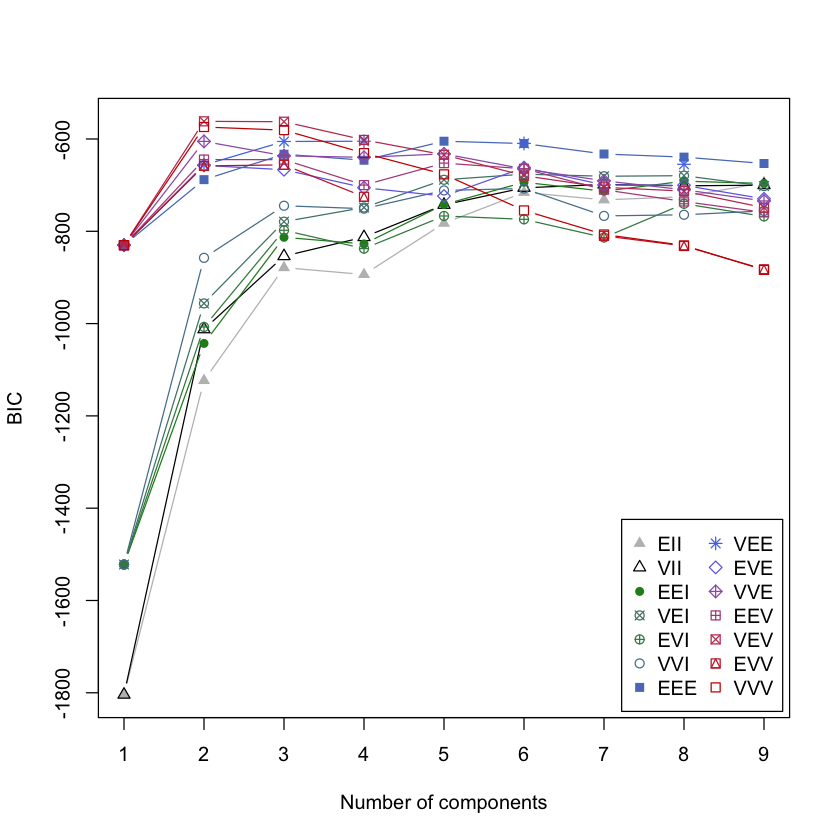

In [15]:
#(e)model based clustering
library(mclust)
model <- Mclust(iris[,-5])
summary(model)
model
plot(model, what="BIC")